# Imports

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

# First Tests

In [73]:
directory = './samples/'

target_filenames = ['100.csv', '150.csv', '200.csv', '250.csv','280.csv', '300.csv', '350.csv', '400.csv']
x,y=[],[]
for filename in target_filenames:
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):  # Check if the file exists
        f = pd.read_csv(filepath, delimiter='\t')
        x.append(f.drop(columns=['channel', 'experimental', 'smoothed', 'Au', '197Au']).values)
        y.append(int(filename.replace('.csv', '')))  # Extract the numeric value from the filename

print("X Data:")
for data in x:
    print(data)
print("\nY Labels:", y)

X Data:
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [

[100 150 200 250 300 350 400 450 500]


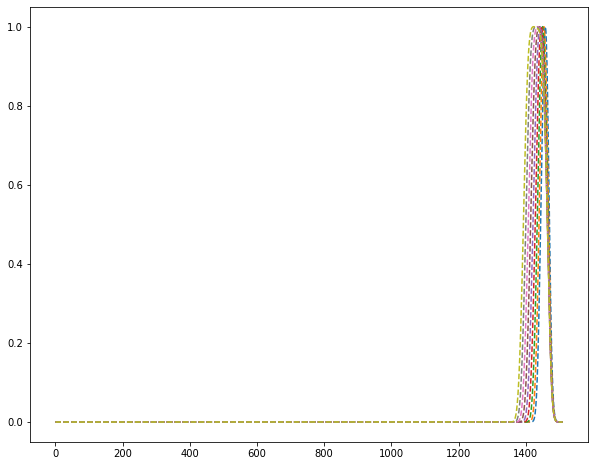

In [119]:
Xx = []
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X = np.array(Xx)
Y = np.array(y)
print(Y)

yaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(10, 8))
for i in X:
    plt.plot(yaxis,i,'--') 

plt.show()

In [75]:
x_train, x_test, labels_train, labels_test = train_test_split(X, Y, test_size = 1, random_state = 2)

print('Numero de espetros: '+ str(len(X)))
print('Numero de bins em cada espetro: '+str(len(X[0])))
print("Normalized test spectrum\n", x_test)
print('\n')
print("Label test\n", labels_test)

Numero de espetros: 8
Numero de bins em cada espetro: 1878
<class 'numpy.ndarray'>
Normalized test spectrum
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00

# ANN to predict thickness of target

In [25]:
with open('data.txt', 'r') as file:
    input_string = file.read()
lines = input_string.split('\n')
x = []
for line in lines:
    values = line.split()
    float_values = [float(value) for value in values]
    x.append(float_values)
del x[len(x)-1]    

with open('labels.txt', 'r') as file:
    input_string = file.read()
y = input_string.split(' ')
y = [float(i) for i in y]

print(x)
print(y)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

50


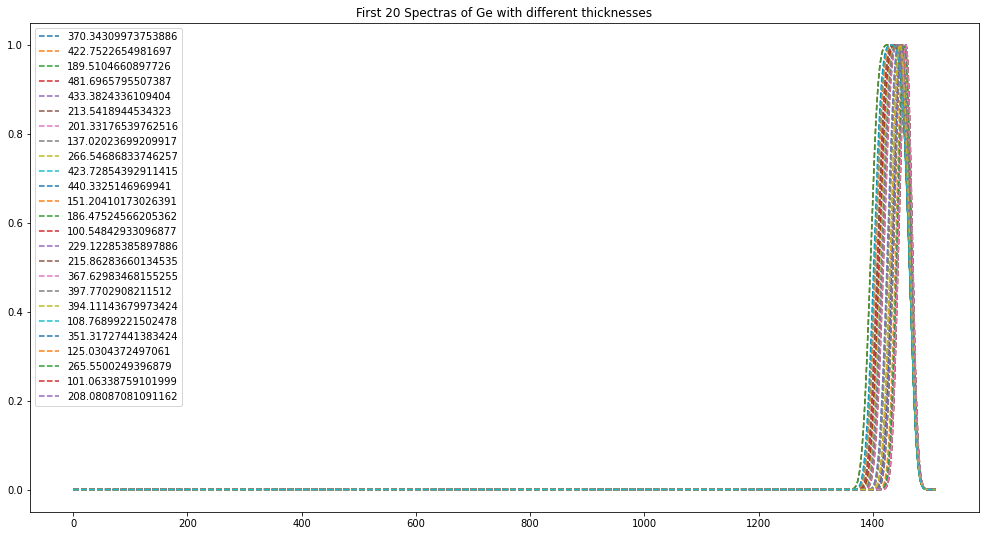

In [79]:
Xx=[]
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

print(len(X))
X=np.array(Xx)
Y=np.array(y)


xaxis=np.arange(len(X[0]))
fig = plt.figure(figsize =(17, 9))
for i in range(len(Y)):
    plt.plot(xaxis,X[i],'--')
plt.legend(Y[:25])
plt.title('First 20 Spectras of Ge with different thicknesses')
plt.show()

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=1,random_state=6)

In [64]:
model=keras.models.Sequential(
    [keras.layers.Dense(100,activation='relu',input_shape=(1511,)),
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(20,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 150
batch_size = 32

In [65]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               151200    
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 20)                1020      
                                                                 
 dense_35 (Dense)            (None, 1)                 21        
                                                                 
Total params: 157291 (614.42 KB)
Trainable params: 157291 (614.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/150
2/2 [==============================] - 0s 5ms/step - loss: 38.6114 - mae: 5.0990
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 38.3512 - mae: 5.1075
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 38.0770 - mae: 5.1071
Epoch 4/150
2/2 [==============================] - 0s 9ms/step - loss: 37.8698 - mae: 5.1000
Epoch 5/150
2/2 [==============================] - 0s 11ms/step - loss: 37.5666 - mae: 5.0874
Epoch 6/150
2/2 [==============================] - 0s 8ms/step - loss: 37.2770 - mae: 5.0678
Epoch 7/150
2/2 [==============================] - 0s 8ms/step - loss: 36.9803 - mae: 5.0458
Epoch 8/150
2/2 [==============================] - 0s 9ms/step - loss: 36.6201 - mae: 5.0090
Epoch 9/150
2/2 [==============================] - 0s 8ms/step - loss: 36.5053 - mae: 4.9932
Epoch 10/150
2/2 [==============================] - 0s 11ms/step - loss: 36.1727 - mae: 4.9379
Epoch 11/150
2/2 [==============================] - 0s 11ms/step - 

In [75]:
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

1/1 [==============================] - 0s 60ms/step - loss: 0.0229 - mae: 0.1515
Mean Absolute Error: 0.1514892578125


In [78]:
predictions=model.predict(X_test)
print('Prediction: ' + str(predictions[0][0]))
print('Real value: ' + str(y_test[0]))

1/1 [==============================] - 0s 26ms/step
Prediction: 430.92917
Real value: 430.77766998922453
